# Visualising Double Slit Experiment using Monte Carlo Simulation

In [1]:
#------------------------------------------------------------------------------#
#                              IMPORTING LIBRARIES                             #
#------------------------------------------------------------------------------#
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Parameters used
#m = Particle mass in kg
#v = Particle velocity in m/s                   

#lamb = h/(m*v) "de broglie wavelength", scaled to be used in this modeled, h = 6.62 × 10^−34 Js. 
#a = Slit width in meters
#d = Distance between slits in meters
#l = Distance to screen in meters

$$I(\theta)=\cos^2(\frac{\pi d\sin(\theta)}{\lambda}) \sin c^2 (\frac {\pi b \sin(\theta)}{\lambda})$$

In [3]:
def Diffraction(a,d,lamb,l,x):
    
    #Calculating some constants
    c = (np.pi*d)/(lamb*l)
    k = (np.pi*a)/(lamb*l)
    
    #Probability function
    probability = ((np.cos(c))**2)*(((np.sin(k*x))/(k*x))**2)
    
    return probability

In [4]:
def MonteCarlo(a,d,lamb,l):
    
    #Monte carlo throw for a particle at a given position on our viewing screen
    x = np.random.uniform(-.001,.001)
    
    p = Diffraction(a,d,lamb,l,x)
    rand = np.random.uniform(0,1)
    
    if (p >= rand):
        return x

In [5]:
#Parameters of our system
m= 9.1*10**-31 #Mass of electron
v= 5*10**5 #velocity                     

lamb = 6.62*10**-34/(m*v) #de broglie wavelength, scaled to be used in this modeled, h = 1. 
a = 150*10**-6 #Slit width
d = 600*10**-6 #Distance between slits
l = 10 #Distance to screen

#The loop that runs the monte carlo to generate the interferance pattern
numParticles = 10**6
particles = []

In [6]:
for i in range(numParticles):
    #Rolling a random y value as well to give our bands vertical spread
    y = np.random.uniform(0,1)
    
    x = MonteCarlo(a,d,lamb,l)
    
    if x != None:
        particles.append([x,y])

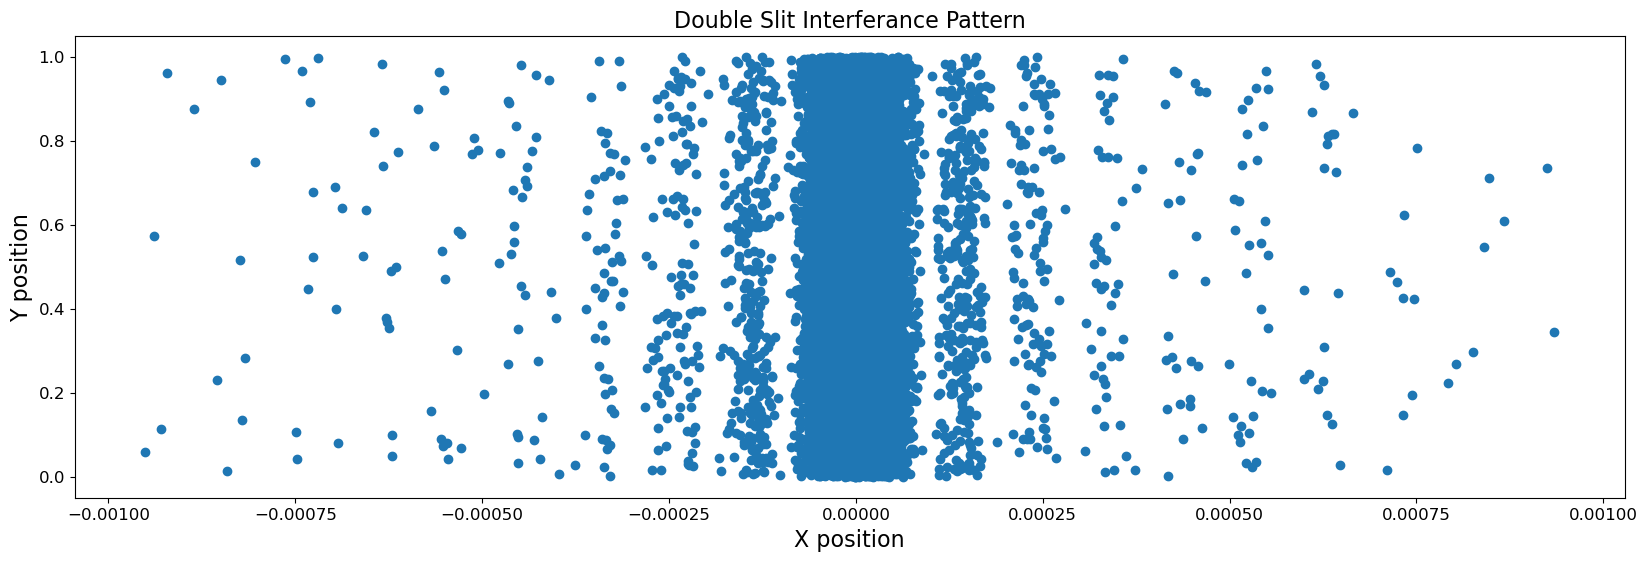

<Figure size 1200x600 with 0 Axes>

In [7]:
#Visualize of the interferance pattern 
particles = np.array(particles)
plt.figure(figsize = (20,6))
plt.scatter(particles[:,0],particles[:,1])
plt.title("Double Slit Interferance Pattern", fontsize = 16)
plt.xlabel("X position", fontsize = 16)
plt.ylabel("Y position", fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

#plt.show() 

plt.figure(figsize = (12,6))

plt.tight_layout()
plt.show()

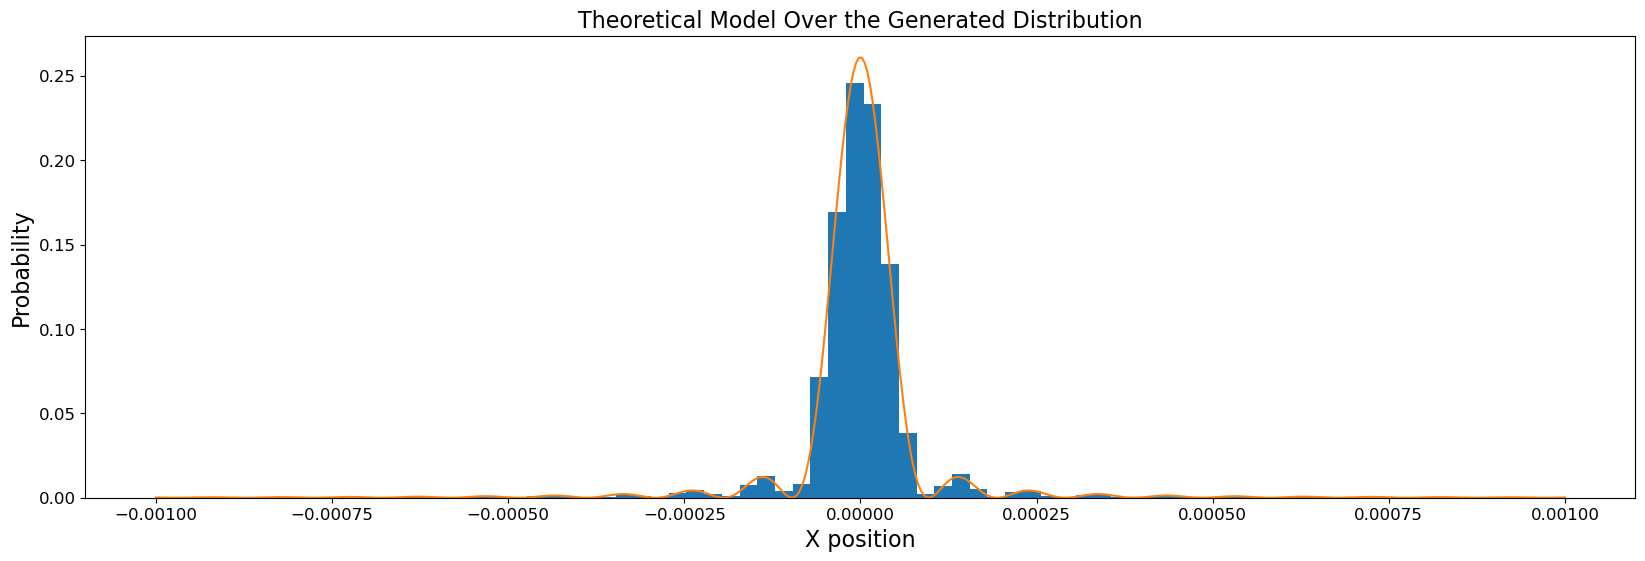

In [8]:
#Showing that the generated model fits the theoretical model.
plt.figure(figsize = (20,6))
weights = np.ones_like(particles[:,0])/float(len(particles[:,0]))
plt.hist(particles[:,0], bins = 75,  weights=weights)#density = True)

x = np.linspace(-.001,.001,500)
plt.plot(x,Diffraction(a,d,lamb,l,x)) #max(p) is there to normalize the function.
plt.title("Theoretical Model Over the Generated Distribution",fontsize = 16)
plt.ylabel("Probability",fontsize = 16)
plt.xlabel("X position",fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()